<a href="https://colab.research.google.com/github/aedupuga2-boop/Task---1/blob/main/Task_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [34]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


After uploading the file, you can verify it's available by listing the files in the current directory.

In [35]:
df = pd.read_csv("car data (1).csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
import os
print(os.listdir())

['.config', 'car data (1).csv', 'car data.csv', 'sample_data']


In [37]:
# Create car age feature
df['car_age'] = 2024 - df['Year']

# Select useful columns
df = df[['Car_Name', 'car_age', 'Selling_Price', 'Present_Price', 'Driven_kms']]

# Extract brand name from Car_Name
df['brand'] = df['Car_Name'].apply(lambda x: x.split()[0])

# Drop Car_Name column
df.drop(columns=['Car_Name'], inplace=True)

df.head()

,car_age,Selling_Price,Present_Price,Driven_kms,brand
0,10,3.35,5.59,27000,ritz
1,11,4.75,9.54,43000,sx4
2,7,7.25,9.85,6900,ciaz
3,13,2.85,4.15,5200,wagon
4,10,4.60,6.87,42450,swift


In [41]:
# One-hot encode 'brand' column
if 'brand' in df.columns:
    df = pd.get_dummies(df, columns=['brand'], drop_first=True)
else:
    print("The 'brand' column is not found. It might have been already one-hot encoded.")

# Define features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

X.head()

The 'brand' column is not found. It might have been already one-hot encoded.
Shape of X_train: (240, 46)
Shape of X_test: (61, 46)
Shape of y_train: (240,)
Shape of y_test: (61,)


,car_age,Present_Price,Driven_kms,brand_Activa,brand_Bajaj,brand_Hero,brand_Honda,brand_Hyosung,brand_KTM,brand_Mahindra,...,brand_land,brand_omni,brand_ritz,brand_s,brand_swift,brand_sx4,brand_verna,brand_vitara,brand_wagon,brand_xcent
0,10,5.59,27000,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,11,9.54,43000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,7,9.85,6900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,13,4.15,5200,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,10,6.87,42450,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.1695862559754295
MSE: 3.1869771139477234
RMSE: 1.7852106637446807
R2 Score: 0.8616498265481145


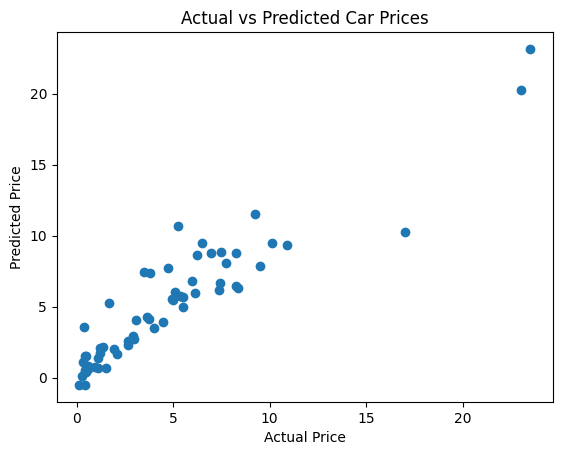

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


Once 'car data.csv' is uploaded and listed, you can re-run the cell that caused the error.